<a href="https://colab.research.google.com/github/alinaiil/ITMO-applied-mathematics-4sem/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выполнили: Ильясова Алина, Воробьева Милана

Группа: М32021

Вариант: 1

---

Лабораторная работа # 2
"Алгоритмы одномерной минимизации"

Нам дана функция, и, чтобы произвести необходимые проверки методов одномерного поиска, мы выбрали интервал, где она унимодальна.

$f(x)=sin(x)⋅x^3, x∈[-6, -2.5]$

Минимумом на этом интервале является точка $(-5.233, -124.317)$

Точность возьмём равной $0.001$.

Внешний вид графика и выбранного на нём интервала: https://www.desmos.com/calculator/mg1zbi12xn?lang=ru

In [ ]:
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt

a1 = -6
b1 = -2.5
eps1 = 0.001


def function(x):
    return np.sin(x)*(x**3)

Первым методом, который мы рассмотрим, будет метод дихотомии. Все методы основаны на том, что мы постоянно сужаем отрезок, в котором гарантированно находится минимум функции, пока длина отрезка не будет удовлетворять условиям заданной точности. Сужаем же мы отрезок, выбирая внутри него точки, которые станут новыми его концами и двигаем его границы. Главное отличие ─ способ выбора точек внутри отрезка.

В методе дихотомии точки выбираются симметрично середине отрезка:

$x_1=(a_i+b_i)/2-δ$

$x_2=(a_i+b_i)/2+δ$

При $δ<ε/2$.

В таком случае за одну итерацию интервал неопределённости уменьшается примерно в два раза, и на каждой итерации функция вычисляется дважды.

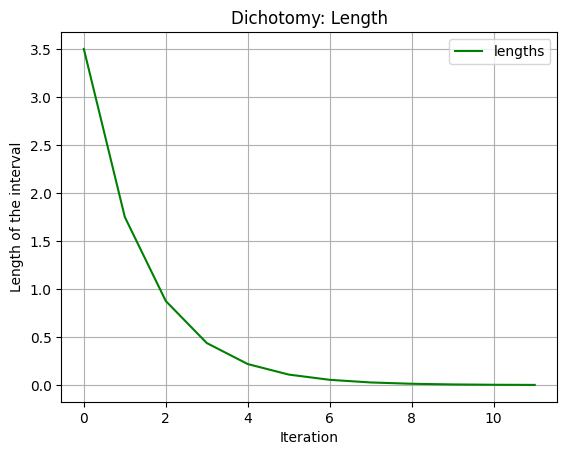

Answer: -5.232812377929688
Number of function calls: 24
+-------------------------+--------------------+--------------------+-----------------------+
| Number of the iteration |         a          |         b          |         Length        |
+-------------------------+--------------------+--------------------+-----------------------+
|            0            |         -6         |        -2.5        |          3.5          |
|            1            |         -6         |      -4.2495       |   1.7504999999999997  |
|            2            |         -6         | -5.124250000000001 |   0.8757499999999991  |
|            3            |     -5.562625      | -5.124250000000001 |  0.43837499999999885  |
|            4            |     -5.3439375     | -5.124250000000001 |  0.21968749999999915  |
|            5            |    -5.23459375     | -5.124250000000001 |   0.1103437499999993  |
|            6            |    -5.23459375     | -5.178921875000001 |  0.05567187499999893  |
|   

In [ ]:
def dichotomy(f, a: float, b: float, eps: float, table):
    counter = 0
    calls = 0
    lengths_d = []
    table.add_row([0, a, b, b - a])
    while np.abs(b - a) > 2*eps:
        counter += 1
        lengths_d.append(b - a)
        x1 = (a+b)/2 - (eps/2)
        x2 = (a+b)/2 + (eps/2)
        fx1 = f(x1)
        fx2 = f(x2)
        calls += 2
        if fx1 < fx2:
            b = x2
        elif fx1 > fx2:
            a = x1
        else:
            a = x1
            b = x2
        table.add_row([counter, a, b, b - a])
    return (a + b)/2, counter, calls, lengths_d


dichotomy_table = PrettyTable()
dichotomy_table.field_names = ["Number of the iteration", "a", "b", "Length"]
ans, n, n_calls, lengths = dichotomy(function, a1, b1, eps1, dichotomy_table)
plt.title("Dichotomy: Length")
ax = plt.gca()
ax.set_xlabel("Iteration")
ax.set_ylabel("Length of the interval")
ax.grid()
plt.plot(range(0, n), lengths, label="lengths", color="green")
plt.legend()
plt.show()
print("Answer: " + str(ans))
print("Number of function calls: " + str(n_calls))
print(dichotomy_table)

Следующий рассматриваемый метод ─ метод золотого сечения. Точки $x_1$ и $x_2$ мы снова находим симметрично от середины отрезка, но на этот раз полагаемся в вычислениях не на неё, а на пропорцию золотого сечения, где длина всего отрезка относится к длине его большей части так же, как длина его большей части относится к длине его меньшей части. Составив и решив нужные уравнения для обеих точек, получаем формулы:

$x_1=b_i-0.618⋅(b_i-a_i)$

$x_2=a_i+0.618⋅(b_i-a_i)$

В этом методе интервал за одну итерацию уменьшается в $1.618$ раз, но на каждой итерации мы будем обращаться к вычислению функции только один раз (кроме самого первого нахождения двух точек $x_1$ и $x_2$), так как при сдвиге вторая найденная точка по-прежнему будет делить полученный отрезок в пропорции золотого сечения, а значение функции в ней мы уже знаем.

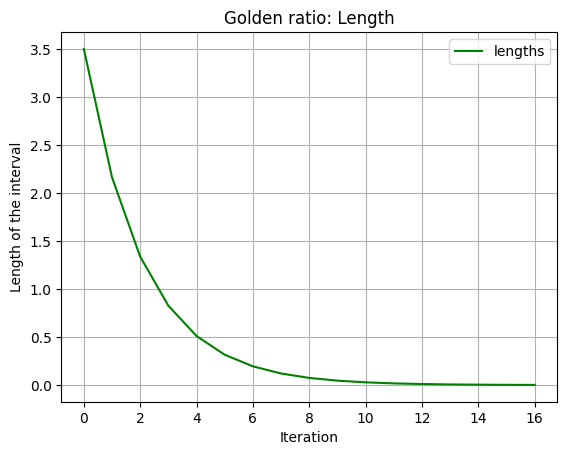

Answer: -5.232670258220525
Number of function calls: 19
+-------------------------+--------------------+--------------------+-----------------------+
| Number of the iteration |         a          |         b          |         Length        |
+-------------------------+--------------------+--------------------+-----------------------+
|            0            |         -6         |        -2.5        |          3.5          |
|            1            |         -6         |       -3.837       |         2.163         |
|            2            |         -6         |       -4.663       |   1.3369999999999997  |
|            3            |     -5.489266      |       -4.663       |   0.8262659999999995  |
|            4            |     -5.489266      |    -4.978633612    |   0.5106323879999994  |
|            5            |  -5.294204427784   |    -4.978633612    |   0.3155708157839996  |
|            6            |  -5.294204427784   | -5.099181663629488 |  0.19502276415451192  |
|   

In [ ]:
def golden_ratio(f, a: float, b: float, eps: float, table):
    counter = 0
    calls = 0
    lengths_gr = []
    table.add_row([0, a, b, b - a])
    x1 = b - 0.618 * (b - a)
    x2 = a + 0.618 * (b - a)
    fx1 = f(x1)
    fx2 = f(x2)
    calls += 2
    while b - a > eps:
        counter += 1
        lengths_gr.append(b - a)
        if fx1 < fx2:
            b = x2
            x2 = x1
            fx2 = fx1
            x1 = b - 0.618 * (b - a)
            fx1 = f(x1)
            calls += 1
        else:
            a = x1
            x1 = x2
            fx1 = fx2
            x2 = a + 0.618 * (b - a)
            fx2 = f(x2)
            calls += 1
        table.add_row([counter, a, b, b - a])
    return (a + b) / 2, calls, counter, lengths_gr


golden_ratio_table = PrettyTable()
golden_ratio_table.field_names = ["Number of the iteration", "a", "b", "Length"]
ans, n_calls, n, lengths = golden_ratio(function, a1, b1, eps1, golden_ratio_table)
plt.title("Golden ratio: Length")
ax = plt.gca()
ax.set_xlabel("Iteration")
ax.set_ylabel("Length of the interval")
ax.grid()
plt.plot(range(0, n), lengths, label="lengths", color="green")
plt.legend()
plt.show()
print("Answer: " + str(ans))
print("Number of function calls: " + str(n_calls))
print(golden_ratio_table)

Следующий метод называется методом Фибоначчи, и основывается он на последовательности Фибоначчи. Мы по сути трансформируем метод золотого сечения в метод Фибоначчи, благодаря пропорциями, выведенными Джеком Кифером: $\frac{F_{n-2}}{F_n}$ и $\frac{F_{n-1}}{F_n}$. Используя их, получаем уравнения для наших точек:

$x_1=a_i+\frac{F_{n-k-2}}{F_{n-k}}⋅(b_i-a_i)$

$x_2=a_i+\frac{F_{n-k-1}}{F_{n-k}}⋅(b_i-a_i)$

Так же как и в методе золотого сечения мы сделаем два вызова функции только в самом начале, а дальше на каждой итерации для одной точки мы уже будем знать значение, а для другой вызовем функцию, то есть, получим один вызов на одну итерацию.

Метод работает за предопределённое число вычислений, все расчёты зависят от $n$. Вычисляется $n$ в зависимости от заданной точности: мы ищем наименьшее число Фибоначчи, большее чем $\frac{b-a}{ε}$.

Уменьшение интервала неопределённости на $k$-й итерации проходит с коэффициентом $\frac{F_{n-k}}{F_{n-k+1}}$.

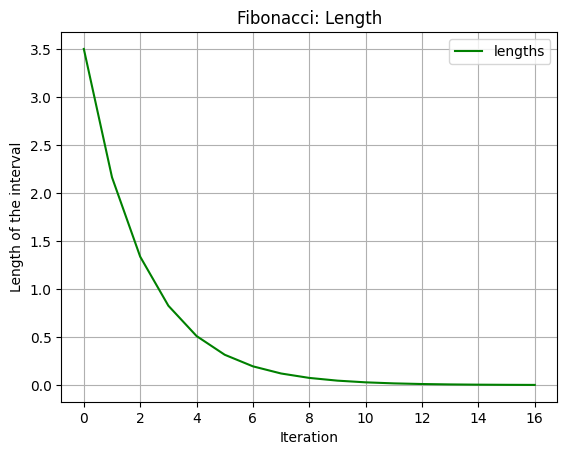

Answer: -5.232742023343207
Number of function calls: 19
+-------------------------+--------------------+---------------------+-----------------------+
| Number of the iteration |         a          |          b          |         Length        |
+-------------------------+--------------------+---------------------+-----------------------+
|            0            |         -6         |         -2.5        |          3.5          |
|            1            |         -6         |  -3.836881128916527 |   2.163118871083473   |
|            2            |         -6         |  -4.663118871083473 |   1.3368811289165272  |
|            3            | -5.489356937213385 |  -4.663118871083473 |   0.8262380661299122  |
|            4            | -5.489356937213385 |  -4.97871387442677  |   0.510643062786615   |
|            5            | -5.294308877770068 |  -4.97871387442677  |  0.31559500334329815  |
|            6            | -5.294308877770068 |  -5.099260818326751 |  0.195048059443316

In [ ]:
def get_n(fn):
    values = [0, 1, 1]
    ind = 2
    while values[ind] <= fn:
        ind += 1
        values.append(values[ind - 2] + values[ind - 1])
    return ind, values


def fibonacci(f, a: float, b: float, eps: float, table):
    n, fib_values = get_n((b - a) / eps)
    counter = 0
    calls = 0
    lengths_fib = []
    table.add_row([0, a, b, b - a])
    x1 = a + fib_values[n - 2] / fib_values[n] * (b - a)
    x2 = a + fib_values[n - 1] / fib_values[n] * (b - a)
    fx1 = f(x1)
    fx2 = f(x2)
    calls += 2
    while n != 2:
        counter += 1
        lengths_fib.append(b - a)
        if fx1 < fx2:
            b = x2
            x2 = x1
            fx2 = fx1
            x1 = a + fib_values[n - 2] / fib_values[n] * (b - a)
            fx1 = f(x1)
            calls += 1
        else:
            a = x1
            x1 = x2
            fx1 = fx2
            x2 = a + fib_values[n - 1] / fib_values[n] * (b - a)
            fx2 = f(x2)
            calls += 1
        table.add_row([counter, a, b, b - a])
        n -= 1
    return (a + b) / 2, calls, counter, lengths_fib


fibonacci_table = PrettyTable()
fibonacci_table.field_names = ["Number of the iteration", "a", "b", "Length"]
ans, n_calls, n, lengths = fibonacci(function, a1, b1, eps1, fibonacci_table)
plt.title("Fibonacci: Length")
ax = plt.gca()
ax.set_xlabel("Iteration")
ax.set_ylabel("Length of the interval")
ax.grid()
plt.plot(range(0, n), lengths, label="lengths", color="green")
plt.legend()
plt.show()
print("Answer: " + str(ans))
print("Number of function calls: " + str(n_calls))
print(fibonacci_table)

Метод парабол отличается от рассмотренных ранее. Он ищет точки, чтобы построить на них параболу, чтобы затем аппроксимировать с её помощью исходную функцию. Мы ищем три точки внутри заданного отрезка, через три точки можно провести параболу и только одну, а значит, мы сможем найти минимум этой параболы.

Мы выбираем три точки из отрезка: $x_1<x_2<x_3$, а затем, решая систему

$ax_i^2+bx_i+c_i=f_i=f(x_i)$, где $i=1, 2, 3$,

получаем минимум параболы:

$u=-\frac{b}{2a}=x_2-\frac{(x_2-x_1)^2(f_2-f_3)-(x_2-x_3)^2(f_2-f_1)}{2[(x_2-x_1)(f_2-f_3)-(x_2-x_3)(f_2-f_1)]}$.

Далее мы сокращаем интервал поиска, сравнивая значения функции в $x_2$ и $u$, пока не достигнем нужной точности.

Метод парабол обладает суперлинейной скоростью сходимости, но она гарантируется только в малой окрестности точки минимума.

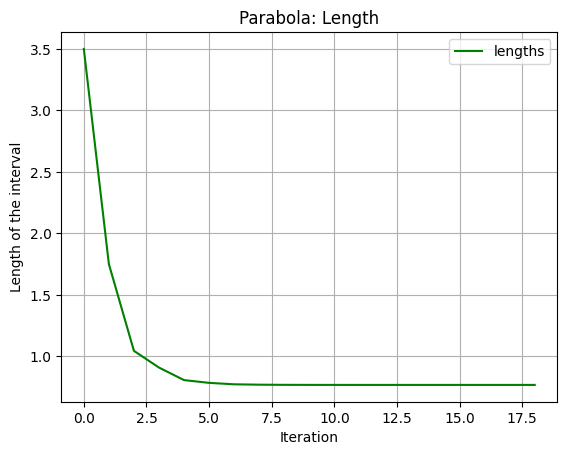

Answer: -5.232938443461428
Number of function calls: 22
+-------------------------+--------------------+--------------------+-----------------------+
| Number of the iteration |         a          |         b          |         Length        |
+-------------------------+--------------------+--------------------+-----------------------+
|            0            |         -6         |        -2.5        |          3.5          |
|            1            |         -6         |       -4.25        |          1.75         |
|            2            |         -6         | -4.955872440137567 |   1.0441275598624333  |
|            3            |         -6         | -5.091691497565453 |   0.9083085024345472  |
|            4            |         -6         | -5.193682590720243 |   0.8063174092797567  |
|            5            |         -6         | -5.21620912604026  |   0.7837908739597399  |
|            6            |         -6         | -5.227915113367326 |   0.7720848866326744  |
|   

In [ ]:
def parabola(f, a: float, b: float, eps: float, table):
    counter = 0
    calls = 0
    lengths_p = []
    table.add_row([0, a, b, b - a])
    c = (a + b) / 2
    fa, fb, fc = f(a), f(b), f(c)
    calls += 3
    while (b - a) > 2*eps:
        counter += 1
        lengths_p.append(b - a)
        u = c - ((c - a) ** 2 * (fc - fb) - (c - b) ** 2 * (fc - fa)) / (
                    2 * ((c - a) * (fc - fb) - (c - b) * (fc - fa)))
        fu = f(u)
        calls += 1
        if c <= u:
            if fc <= fu:
                b = u
                fb = fu
            else:
                a, c = c, u
                fa, fc = fc, fu
        else:
            if fc < fu:
                a = u
                fa = fu
            else:
                b = c
                c = u
                fb = fc
                fc = fu
        table.add_row([counter, a, b, b - a])
    return (a + b) / 2, calls, counter, lengths_p


parabola_table = PrettyTable()
parabola_table.field_names = ["Number of the iteration", "a", "b", "Length"]
ans, n_calls, n, lengths = parabola(function, a1, b1, eps1, parabola_table)
plt.title("Parabola: Length")
ax = plt.gca()
ax.set_xlabel("Iteration")
ax.set_ylabel("Length of the interval")
ax.grid()
plt.plot(range(0, n), lengths, label="lengths", color="green")
plt.legend()
plt.show()
print("Answer: " + str(ans))
print("Number of function calls: " + str(n_calls))
print(parabola_table)

Комбинированный метод Брента - в основном используется на практике в виду своих достоинств, которые обеспечиваются комбинацией метода Золотого сечения и метода Парабол.

[a, c] - интервао поиска
x - наименьшее значение функции на текущей итерации

Модифицированный метод парабол:

$ω$ - второе наименьшее значение функции

$υ$ - предыдущее значение $ω$

$f_x, f_w, f_v = f(x), f(w),f(v)$ эти переменные подаются в описанный выше метод парабол.

Если вершина принимается, обновляется величина предыдущего шага.

Условия принятия $u$:

  $u$ попадает внутрь интервала [a, c] и отстоит от границ интервала не менее, чем на ε;

  $u$ отстоит от точки x не более, чем на половину от длины предпредыдущего шага.

  Если новая вершина параболы отвергнута, то следующая точка ищется с помощью золотого сечения  большего из
интервалов [a, x] и [x, c].

Затем условным операторм сравнения значений $f_u$ и $f_x$ и $u$ и $x$ из метода парабол обновляем переменные и алгоритм повторяется, пока сходимость не достгнет нужной точности.

Величина уменьшения шага зависит от метода на конкретной итерации.


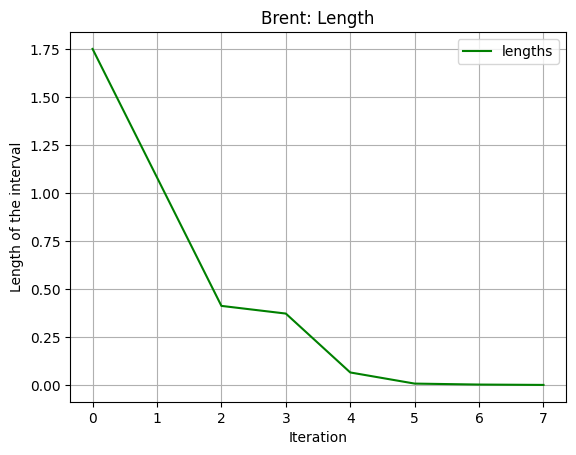

Answer: -5.232672538014327
Number of function calls: 9
+-------------------------+--------------------+---------------------+----------------------+
| Number of the iteration |         a          |          b          |        Length        |
+-------------------------+--------------------+---------------------+----------------------+
|            0            |         -6         |         -2.5        |         3.5          |
|            1            |         -6         |        -4.25        |         1.75         |
|            2            |         -6         | -4.9184405196876835 |  1.0815594803123165  |
|            3            | -5.331559480312316 | -4.9184405196876835 | 0.41311896062463216  |
|            4            | -5.291627736726115 | -4.9184405196876835 |  0.3731872170384314  |
|            5            | -5.291627736726115 |  -5.224806642731974 | 0.06682109399414049  |
|            6            | -5.233656082787435 |  -5.224806642731974 | 0.008849440055461066 |
|    

In [ ]:
def get_u(x, w, v, fx, fw, fv):
    if 2 * ((w - x) * (fw - fv) - (w - v) * (fw - fx)) == 0:
        return None
    else:
        return w - ((w - x) ** 2 * (fw - fv) - (w - v) ** 2 * (fw - fx)) / (
                2 * ((w - x) * (fw - fv) - (w - v) * (fw - fx)))


def brent(f, a: float, b: float, eps: float, table):
    counter = 0
    calls = 0
    lengths_b = []
    table.add_row([0, a, b, b - a])
    K = (3 - np.sqrt(5)) / 2
    x = w = v = (a + b) / 2
    fx = fw = fv = f(x)
    calls += 1
    d = e = b - a
    while (b - a) > 2*eps:
        g = e
        e = d
        counter += 1
        u_test = get_u(x, w, v, fx, fw, fv)
        if u_test is not None and a + eps <= u_test <= b - eps and abs(u_test - x) < g / 2:
            u = u_test
            d = np.abs(u - x)
        else:
            if x < (a + b) / 2:
                u = x + K * (b - x)
                d = b - x
            else:
                u = x - K * (x - a)
                d = x - a
        fu = f(u)
        calls += 1
        if fu <= fx:
            if u >= x:
                a = x
            else:
                b = x
            v = w
            w = x
            x = u
            fv = fw
            fw = fx
            fx = fu
        else:
            if u >= x:
                b = u
            else:
                a = u
            if fu < fw or w == x:
                v = w
                w = u
                fv = fw
                fw = fu
            elif fu <= fv or v == w or v == x:
                v = u
                fv = fu
        lengths_b.append(b - a)
        table.add_row([counter, a, b, b - a])
    return (a + b) / 2, calls, counter, lengths_b


brent_table = PrettyTable()
brent_table.field_names = ["Number of the iteration", "a", "b", "Length"]
ans, n_calls, n, lengths = brent(function, a1, b1, eps1, brent_table)
plt.title("Brent: Length")
ax = plt.gca()
ax.set_xlabel("Iteration")
ax.set_ylabel("Length of the interval")
ax.grid()
plt.plot(range(0, n), lengths, label="lengths", color="green")
plt.legend()
plt.show()
print("Answer: " + str(ans))
print("Number of function calls: " + str(n_calls))
print(brent_table)

Таким образом, мы избегаем биений и застопориваний метода парабол, используя надежный метод Золотого сечения в невыгодных ситуациях. И при этом при хороших значениях вершины параболы у нас получается  использовать суперлинейную скорость сходимости метода Брента.


Теперь сравним все методы по количеству итераций и количеству вызовов функций для разных значений точности.

Comparison by iterations:
+-----------+--------------+-----------+----------+
| Dichotomy | Golden ratio | Fibonacci | Parabola |
+-----------+--------------+-----------+----------+
|    18.0   |     13.0     |    12.0   |   19.0   |
|    24.0   |     17.0     |    17.0   |   19.0   |
|    32.0   |     22.0     |    22.0   |   19.0   |
|    38.0   |     27.0     |    27.0   |   19.0   |
|    44.0   |     31.0     |    31.0   |   19.0   |
+-----------+--------------+-----------+----------+
Comparison by the number of function calls:
+-----------+--------------+-----------+----------+
| Dichotomy | Golden ratio | Fibonacci | Parabola |
+-----------+--------------+-----------+----------+
|    9.0    |     15.0     |    14.0   |   22.0   |
|    12.0   |     19.0     |    19.0   |   22.0   |
|    16.0   |     24.0     |    24.0   |   22.0   |
|    19.0   |     29.0     |    29.0   |   22.0   |
|    22.0   |     33.0     |    33.0   |   22.0   |
+-----------+--------------+-----------+------

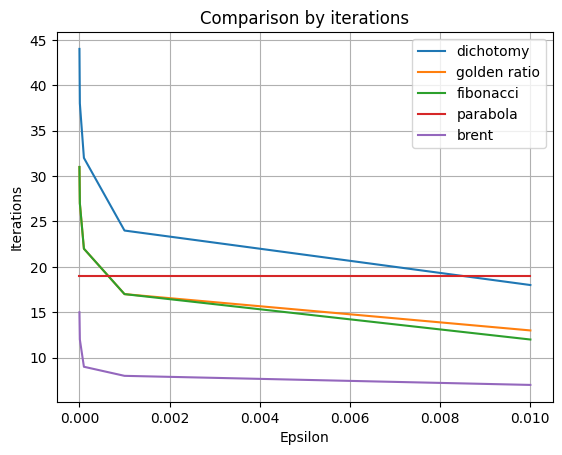

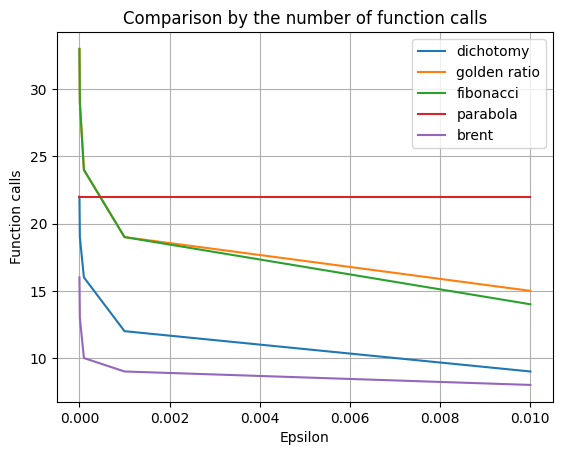

In [ ]:
comparison_table1 = PrettyTable()
comparison_table1.field_names = ["Dichotomy", "Golden ratio", "Fibonacci", "Parabola"]
comparison_table2 = PrettyTable()
comparison_table2.field_names = ["Dichotomy", "Golden ratio", "Fibonacci", "Parabola"]
eps_comp = 0.01
n_calls_d = np.zeros(5)
n_calls_gr = np.zeros(5)
n_calls_f = np.zeros(5)
n_calls_p = np.zeros(5)
n_calls_b = np.zeros(5)
n_d = np.zeros(5)
n_gr = np.zeros(5)
n_f = np.zeros(5)
n_p = np.zeros(5)
n_b = np.zeros(5)
eps_arr = np.zeros(5)
for i in range(0,5):
  eps_arr[i] = eps_comp
  ans_d, n_calls_d[i], n_d[i], lengths_d = dichotomy(function, a1, b1, eps_comp, PrettyTable())
  ans_gr, n_calls_gr[i], n_gr[i], lengths_gr = golden_ratio(function, a1, b1, eps_comp, PrettyTable())
  ans_f, n_calls_f[i], n_f[i], lengths_f = fibonacci(function, a1, b1, eps_comp, PrettyTable())
  ans_p, n_calls_p[i], n_p[i], lengths_p = parabola(function, a1, b1, eps_comp, PrettyTable())
  ans_b, n_calls_b[i], n_b[i], lengths_b = brent(function, a1, b1, eps_comp, PrettyTable())
  comparison_table1.add_row([n_d[i], n_gr[i], n_f[i], n_p[i]])
  comparison_table2.add_row([n_calls_d[i], n_calls_gr[i], n_calls_f[i], n_calls_p[i]])
  eps_comp /= 10

print("Comparison by iterations:")
print(comparison_table1)
print("Comparison by the number of function calls:")
print(comparison_table2)

plt.title("Comparison by iterations")
ax = plt.gca()
ax.set_xlabel("Epsilon")
ax.set_ylabel("Iterations")
ax.grid()
plt.plot(eps_arr, n_d, label="dichotomy")
plt.plot(eps_arr, n_gr, label="golden ratio")
plt.plot(eps_arr, n_f, label="fibonacci")
plt.plot(eps_arr, n_p, label="parabola")
plt.plot(eps_arr, n_b, label="brent")
plt.legend()
plt.show()

plt.title("Comparison by the number of function calls")
ax = plt.gca()
ax.set_xlabel("Epsilon")
ax.set_ylabel("Function calls")
ax.grid()
plt.plot(eps_arr, n_calls_d, label="dichotomy")
plt.plot(eps_arr, n_calls_gr, label="golden ratio")
plt.plot(eps_arr, n_calls_f, label="fibonacci")
plt.plot(eps_arr, n_calls_p, label="parabola")
plt.plot(eps_arr, n_calls_b, label="brent")
plt.legend()
plt.show()

Метод Брента показывает лучший результат по обоим сравнениям, несмотря на не самые лучшие результаты методов, которые лежат в его основе.
Метод дихотомии очень быстро сужает интервал поиска, поэтому предсказуемо, что итарвций у него будет не много, но приходится платить частым обращением к функции (2 раза). Метод Фиббоначи, являясь улучшенным методом золотого сечения, расположен с ним близко на графиках, но показывает результат немного лучше. Метод парабол, обладая суперлинейной скоростью сходимости, мог бы показать лучшие результаты, но так как такая высокая скорость обеспечивается только в малой окрестности минимима, то результат получаеся стабильный, но не самй лучший. Хотя при маленьком эпсилон этот метод, как и должен, показывает себя весьма достойно.

Посмотрим, как проявляют себя методы, если минимизировать с их помощью многомодальную функцию


Для большинства одномерных методов минимизации играет роль не сколько уни\многомодальность функции, а сколько удовлетворение условию Липшица.

$|f(x_1) - f(x_2)|  <= L|x_1-x_2|$
для каждой пары из [a, b]
где L > 0 - константа Липшеца

Геометрический смысл:

$|tg(f(x))|<= L, ∀x∈ [a, b]$

на картинке представлено нарушение условия Липшица на примере функции $\sqrt{x}$. При стремлении x к 0, модуль углового коэффициента неограниченно возрастает.
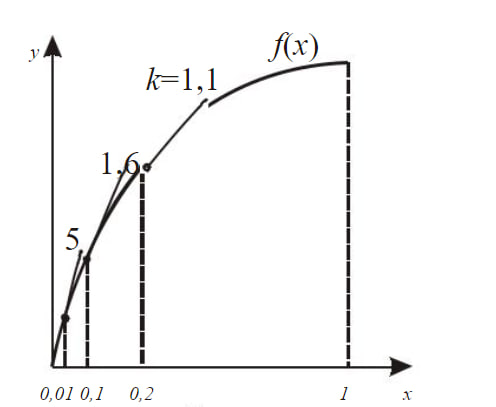





In [ ]:
def polymodal_function(x):
    # return x ** (1 / 3) * 2 ** np.cos(x)
    # return 0.1 * x + 2 * np.sin(4 * x)
    return np.cos(10 * x) / np.exp(x)
    # Не удовлетворяет условию Липшица
    # return np.sqrt(x)


a1 = 0.
b1 = 4.
eps1 = 0.001

https://www.desmos.com/calculator/bkzcv8qhgx?lang=ru



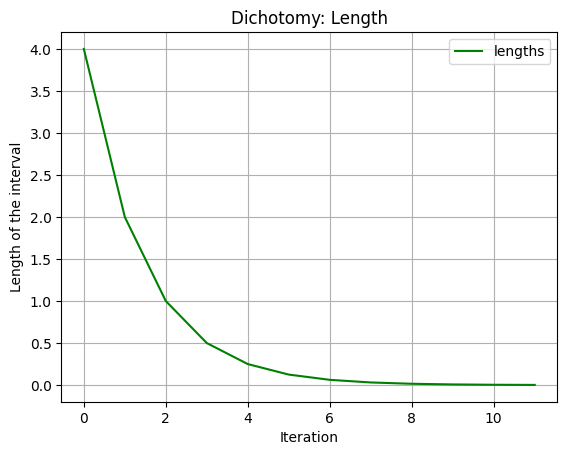

Answer: 2.1889176025390626
Number of function calls: 24
+-------------------------+-------------------+--------------------+-----------------------+
| Number of the iteration |         a         |         b          |         Length        |
+-------------------------+-------------------+--------------------+-----------------------+
|            0            |        0.0        |        4.0         |          4.0          |
|            1            |       1.9995      |        4.0         |   2.0004999999999997  |
|            2            |       1.9995      | 3.0002500000000003 |   1.0007500000000003  |
|            3            |       1.9995      | 2.5003750000000005 |   0.5008750000000004  |
|            4            |       1.9995      | 2.2504375000000003 |  0.25093750000000026  |
|            5            |     2.12446875    | 2.2504375000000003 |  0.12596875000000018  |
|            6            |    2.186953125    | 2.2504375000000003 |  0.06348437500000026  |
|            7

In [ ]:
dichotomy_table = PrettyTable()
dichotomy_table.field_names = ["Number of the iteration", "a", "b", "Length"]
ans, n, n_calls, lengths = dichotomy(polymodal_function, a1, b1, eps1, dichotomy_table)
plt.title("Dichotomy: Length")
ax = plt.gca()
ax.set_xlabel("Iteration")
ax.set_ylabel("Length of the interval")
ax.grid()
plt.plot(range(0, n), lengths, label="lengths", color="green")
plt.legend()
plt.show()
print("Answer: " + str(ans))
print("Number of function calls: " + str(n_calls))
print(dichotomy_table)

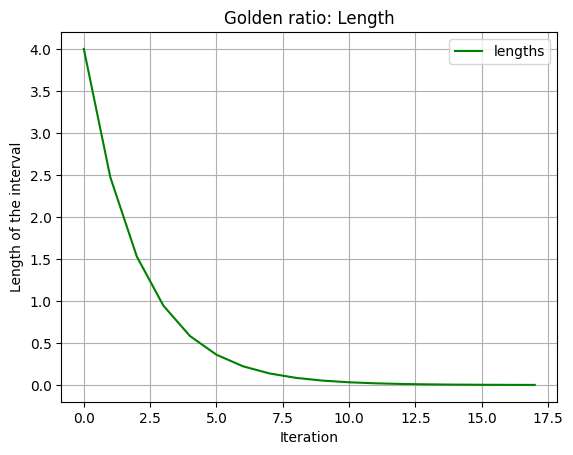

Answer: 0.9326839314745761
Number of function calls: 20
+-------------------------+--------------------+--------------------+-----------------------+
| Number of the iteration |         a          |         b          |         Length        |
+-------------------------+--------------------+--------------------+-----------------------+
|            0            |        0.0         |        4.0         |          4.0          |
|            1            |        0.0         |       2.472        |         2.472         |
|            2            |        0.0         |       1.528        |         1.528         |
|            3            |      0.583696      |       1.528        |        0.944304       |
|            4            |      0.583696      |    1.167275872     |      0.583579872      |
|            5            |   0.806623511104   |    1.167275872     |  0.36065236089600006  |
|            6            |   0.806623511104   | 1.029506670137728  |  0.22288315903372802  |
|   

In [ ]:
golden_ratio_table = PrettyTable()
golden_ratio_table.field_names = ["Number of the iteration", "a", "b", "Length"]
ans, n_calls, n, lengths = golden_ratio(polymodal_function, a1, b1, eps1, golden_ratio_table)
plt.title("Golden ratio: Length")
ax = plt.gca()
ax.set_xlabel("Iteration")
ax.set_ylabel("Length of the interval")
ax.grid()
plt.plot(range(0, n), lengths, label="lengths", color="green")
plt.legend()
plt.show()
print("Answer: " + str(ans))
print("Number of function calls: " + str(n_calls))
print(golden_ratio_table)

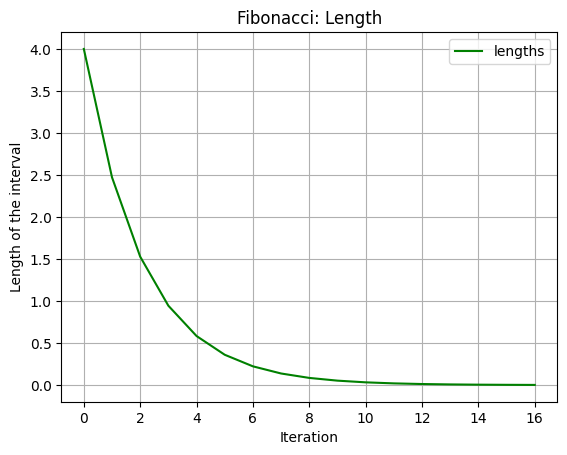

Answer: 0.9324464074633216
Number of function calls: 19
+-------------------------+--------------------+--------------------+-----------------------+
| Number of the iteration |         a          |         b          |         Length        |
+-------------------------+--------------------+--------------------+-----------------------+
|            0            |        0.0         |        4.0         |          4.0          |
|            1            |        0.0         | 2.4721358526668262 |   2.4721358526668262  |
|            2            |        0.0         | 1.5278641473331738 |   1.5278641473331738  |
|            3            | 0.583592071756131  | 1.5278641473331738 |   0.9442720755770427  |
|            4            | 0.583592071756131  | 1.1671841435122619 |   0.5835920717561308  |
|            5            | 0.8065041396913502 | 1.1671841435122619 |   0.3606800038209117  |
|            6            | 0.8065041396913502 | 1.0294162076265694 |  0.22291206793521923  |
|   

In [ ]:
fibonacci_table = PrettyTable()
fibonacci_table.field_names = ["Number of the iteration", "a", "b", "Length"]
ans, n_calls, n, lengths = fibonacci(polymodal_function, a1, b1, eps1, fibonacci_table)
plt.title("Fibonacci: Length")
ax = plt.gca()
ax.set_xlabel("Iteration")
ax.set_ylabel("Length of the interval")
ax.grid()
plt.plot(range(0, n), lengths, label="lengths", color="green")
plt.legend()
plt.show()
print("Answer: " + str(ans))
print("Number of function calls: " + str(n_calls))
print(fibonacci_table)

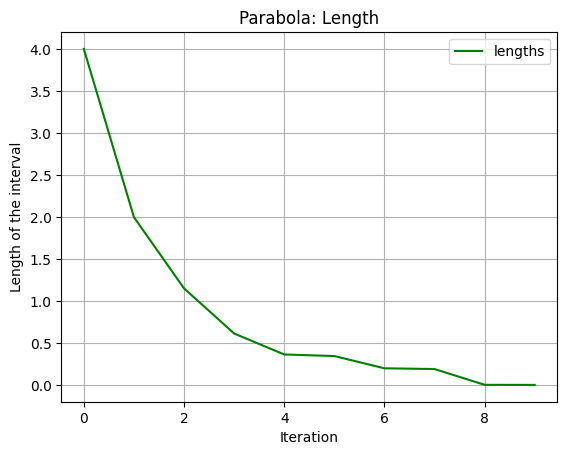

Answer: 2.1889498378980132
Number of function calls: 13
+-------------------------+-------------------+--------------------+----------------------+
| Number of the iteration |         a         |         b          |        Length        |
+-------------------------+-------------------+--------------------+----------------------+
|            0            |        0.0        |        4.0         |         4.0          |
|            1            |        2.0        |        4.0         |         2.0          |
|            2            |        2.0        |  3.15374691468484  |  1.1537469146848398  |
|            3            |        2.0        | 2.617213471483694  |  0.6172134714836939  |
|            4            |        2.0        | 2.368178869395641  | 0.36817886939564115  |
|            5            |        2.0        | 2.349452823116556  |  0.3494528231165561  |
|            6            |        2.0        | 2.2037879863731376 | 0.20378798637313755  |
|            7          

In [ ]:
parabola_table = PrettyTable()
parabola_table.field_names = ["Number of the iteration", "a", "b", "Length"]
ans, n_calls, n, lengths = parabola(polymodal_function, a1, b1, eps1, parabola_table)
plt.title("Parabola: Length")
ax = plt.gca()
ax.set_xlabel("Iteration")
ax.set_ylabel("Length of the interval")
ax.grid()
plt.plot(range(0, n), lengths, label="lengths", color="green")
plt.legend()
plt.show()
print("Answer: " + str(ans))
print("Number of function calls: " + str(n_calls))
print(parabola_table)

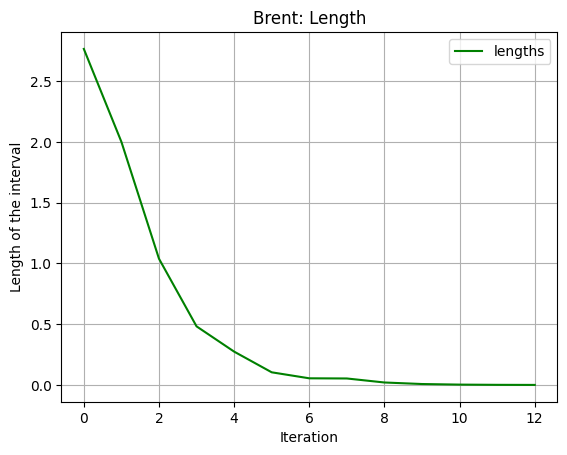

Answer: 2.8176495686928464
Number of function calls: 14
+-------------------------+--------------------+--------------------+-----------------------+
| Number of the iteration |         a          |         b          |         Length        |
+-------------------------+--------------------+--------------------+-----------------------+
|            0            |        0.0         |        4.0         |          4.0          |
|            1            | 1.2360679774997898 |        4.0         |    2.76393202250021   |
|            2            |        2.0         |        4.0         |          2.0          |
|            3            |        2.0         | 3.0391840046469643 |   1.0391840046469643  |
|            4            | 2.5562739554171174 | 3.0391840046469643 |   0.4829100492298468  |
|            5            |  2.76393202250021  | 3.0391840046469643 |  0.27525198214675406  |
|            6            |  2.76393202250021  | 2.869068924209491  |  0.10513690170928092  |
|   

In [ ]:
brent_table = PrettyTable()
brent_table.field_names = ["Number of the iteration", "a", "b", "Length"]
ans, n_calls, n, lengths = brent(polymodal_function, a1, b1, eps1, brent_table)
plt.title("Brent: Length")
ax = plt.gca()
ax.set_xlabel("Iteration")
ax.set_ylabel("Length of the interval")
ax.grid()
plt.plot(range(0, n), lengths, label="lengths", color="green")
plt.legend()
plt.show()
print("Answer: " + str(ans))
print("Number of function calls: " + str(n_calls))
print(brent_table)

Для всех функций, удовлетворяющих условию Липшица, удается найти минимум. Но для функции, не удовлетворяющей условию Липшица, методы начали ломаться.
К тому же наблюдается интересный эффект на графиках работы методов параболы и Брента: они от функции к функции значительно меняются и к тому же поведение заметно меняются в сравнении с унимодальными функциями, чего не скажешь о первых трех методах. Они не отличаются почти как и от функции к функции, так и по сравнению с унимодальными функциями.
Метод золотого сечения себя значительно не проявил. Стабильный результат. Как и у метода Брента. Но у этого метода графики интереснее, хотя результат в итоге тоже верный.